## Importing Libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset.

In [2]:
df=pd.read_csv('Student_Scores.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


## Initial Inspection of the data. Data Exploration.

In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [56]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEducation', 'LunchType',
       'TestPreparation', 'ParentMaritalStatus', 'PracticeSport',
       'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WeeklyStudyHours',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

## Handling null and duplicate records.

In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
df.drop(columns={'Unnamed: 0'},inplace=True)

In [10]:
df['NrSiblings'] = df['NrSiblings'].fillna(df['NrSiblings'].mean())


In [ ]:
## replacing null values with mean,median-- numeric data and mode-categorical data.
df['TransportMeans'].fillna(df['TransportMeans'].mode() [0], inplace=True)
df['IsFirstChild'].fillna(df['IsFirstChild'].mode() [0], inplace=True)
df['PracticeSport'].fillna(df['TransportMeans'].mode() [0], inplace=True)
df['ParentMaritalStatus'].fillna(df['TransportMeans'].mode() [0], inplace=True)
df['TestPreparation'].fillna(df['TransportMeans'].mode() [0], inplace=True)
df['ParentEducation'].fillna(df['ParentEducation'].mode() [0], inplace=True)
df['EthnicGroup'].fillna(df['EthnicGroup'].mode() [0], inplace=True)
df['WeeklyStudyHours'].fillna(df['WeeklyStudyHours'].mode() [0], inplace=True)


In [57]:
df.head()

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WeeklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,school_bus,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [12]:
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEducation        0
LunchType              0
TestPreparation        0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WeeklyStudyHours       0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df[df.duplicated()]

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WeeklyStudyHours,MathScore,ReadingScore,WritingScore
13494,female,group C,some high school,free/reduced,none,married,sometimes,yes,1.0,private,< 5,49,64,58


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

## Renaming the columns.

In [ ]:
df.rename(columns={'ParentEduc':'ParentEducation','TestPrep':'TestPreparation','WklyStudyHours':'WeeklyStudyHours'},inplace=True)

In [59]:
df.sample(2)

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WeeklyStudyHours,MathScore,ReadingScore,WritingScore
26339,female,group A,some college,standard,none,divorced,never,yes,0.0,private,5 - 10,58,65,66
7153,male,group D,associate's degree,standard,school_bus,married,never,yes,0.0,school_bus,5 - 10,95,87,87


## Gender distribution.

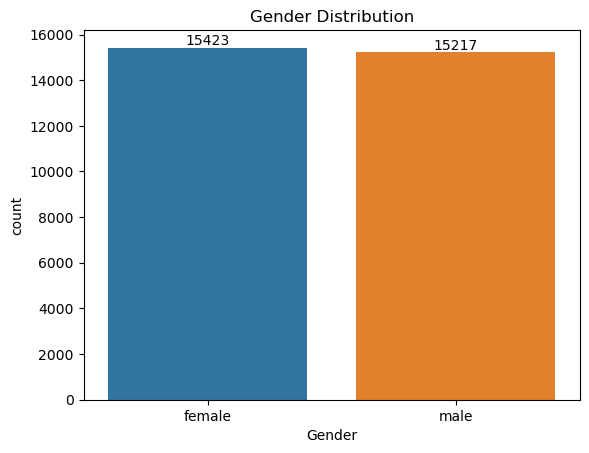

In [25]:
ax=sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

#### From the above chart we have analysed that,number of female students are more than the male students.

In [18]:
gb=df.groupby('ParentEducation').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEducation,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.445978,69.189667,68.456711
some high school,62.586476,65.511059,63.633430


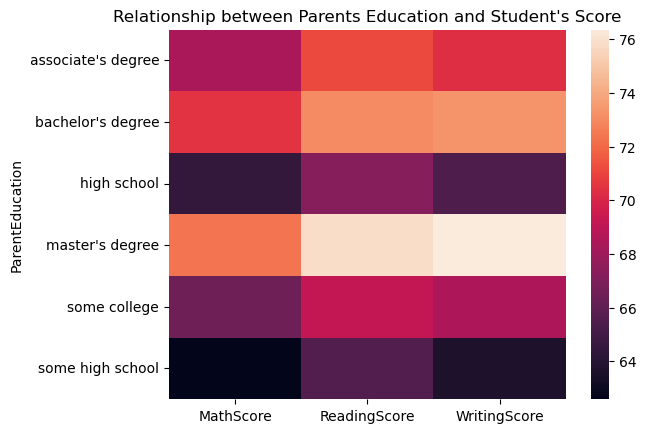

In [27]:
sns.heatmap(gb)
plt.title("Relationship between Parents Education and Student's Score")
plt.show()

#### From the above chart, we can conclude that Parents education has a deep impact on their scores.

In [21]:
gb1=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.658374,69.389895,68.421599
school_bus,66.548739,69.237815,68.196639
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


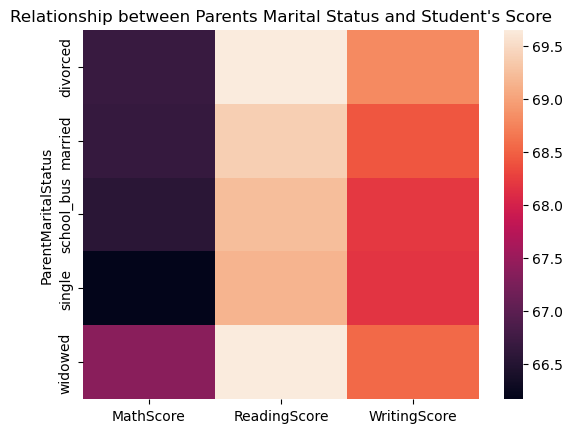

In [28]:
sns.heatmap(gb1)
plt.title("Relationship between Parents Marital Status and Student's Score")
plt.show()

#### From the above chart, we can conclude that there is no/neglible impact on students score due to their parents marital status.

<Axes: xlabel='MathScore'>

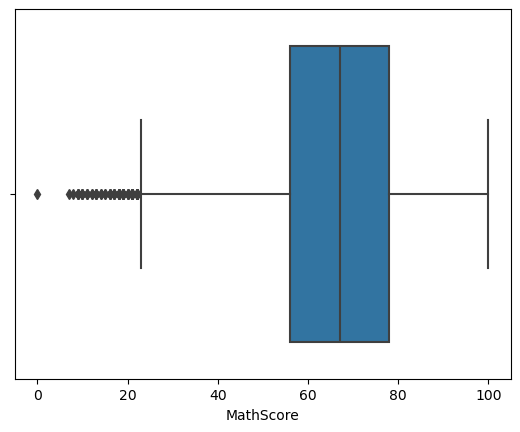

In [31]:
sns.boxplot(data=df,x='MathScore')

<Axes: xlabel='ReadingScore'>

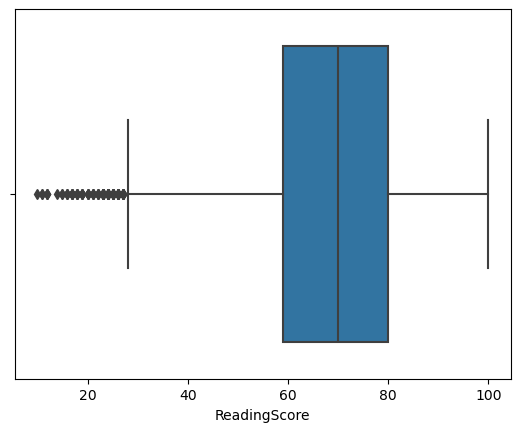

In [32]:
sns.boxplot(data=df,x='ReadingScore')

<Axes: xlabel='WritingScore'>

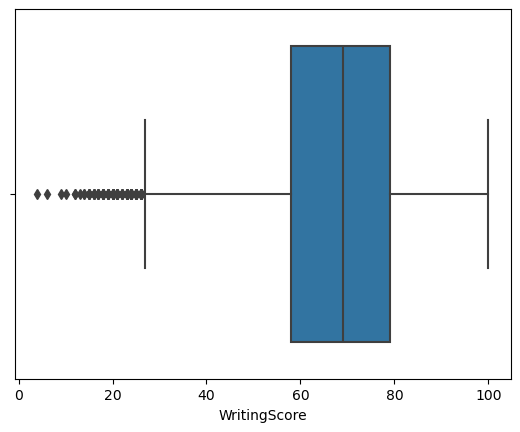

In [62]:
sns.boxplot(data=df,x='WritingScore')

#### From the above boxplots, we can conclude that students generally appear weaker in Maths as compared to reading and writing.

In [34]:
df['EthnicGroup'].unique()

array(['group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

## Distribution of Ethnic groups.

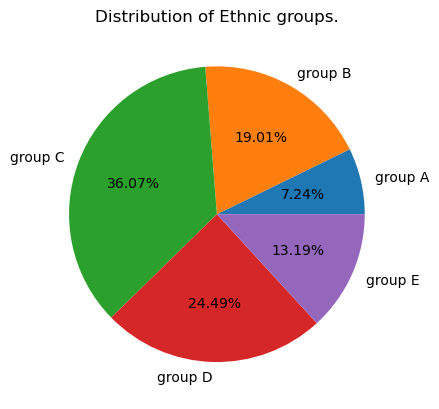

In [55]:
groupA=df.loc[(df['EthnicGroup']=='group A')].count()
groupB=df.loc[(df['EthnicGroup']=='group B')].count()
groupC=df.loc[(df['EthnicGroup']=='group C')].count()
groupD=df.loc[(df['EthnicGroup']=='group D')].count()
groupE=df.loc[(df['EthnicGroup']=='group E')].count()
mlist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
l=['group A','group B','group C','group D','group E']
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title('Distribution of Ethnic groups.')
plt.show()


#### Majority of the students in the school belong to Ethnic group C.